## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [19]:
train, test = keras.datasets.cifar10.load_data()

In [20]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [21]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [25]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [26]:
#設定超參數
LEARNING_RATE = 0.01
BATCH_SIZE = 256
MOMENTUM = [0.75, 0.8, 0.85, 0.9, 0.95]

In [28]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for mmt in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Momentum = %.6f" % (mmt))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=mmt)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # 訓練的結果
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    momentum_tag = "momentum-%s" % str(mmt)
    
    # 將結果用 dictionary 紀錄
    results[momentum_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Momentum = 0.750000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 96s 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 85s 2ms/step - loss: 1.9025 - acc: 0.3189 - val_loss: 1.9398 - val_acc: 0.2988
Epoch 2/50
50000/50000 [==============================] - 71s 1ms/step - loss: 1.7082 - acc: 0.3959 - val_loss: 1.7340 - val_acc: 0.3759
Epoch 3/50
50000/50000 [==============================] - 67s 1ms/step - loss: 1.6215 - acc: 0.4264 - val_loss: 1.6941 - val_acc: 0.3856
Epoch 4/50
50000/50000 [==============================] - 66s 1ms/step - loss: 1.5661 - acc: 0.4438 - val_loss: 1.5986 - val_acc: 0.4267
Epoch 5/50
50000/50000 [==============================] - 65s 1ms/step - loss: 1.5230 - acc: 0.4606 - val_loss: 1.5354 - val_acc: 0.4460
Epoch 6/50
50000/50000 [==============================] - 70s 1ms/step - loss: 1.4821 - acc: 0.4758 - val_loss: 1.4841 - val_acc: 0.4744
Epoch 7/50
50000/50000 [==============================] - 70s 1ms/step - loss: 1.4497 - acc: 0.4884 - val_loss: 1.5301 - val_acc

50000/50000 [==============================] - 76s 2ms/step - loss: 1.6812 - acc: 0.4043 - val_loss: 1.7274 - val_acc: 0.3886
Epoch 3/50
50000/50000 [==============================] - 74s 1ms/step - loss: 1.5940 - acc: 0.4363 - val_loss: 1.7186 - val_acc: 0.3810
Epoch 4/50
50000/50000 [==============================] - 77s 2ms/step - loss: 1.5342 - acc: 0.4576 - val_loss: 1.6014 - val_acc: 0.4344
Epoch 5/50
50000/50000 [==============================] - 77s 2ms/step - loss: 1.4854 - acc: 0.4752 - val_loss: 1.5280 - val_acc: 0.4562
Epoch 6/50
50000/50000 [==============================] - 76s 2ms/step - loss: 1.4444 - acc: 0.4903 - val_loss: 1.4994 - val_acc: 0.4694
Epoch 7/50
50000/50000 [==============================] - 72s 1ms/step - loss: 1.4043 - acc: 0.5023 - val_loss: 1.5319 - val_acc: 0.4490
Epoch 8/50
50000/50000 [==============================] - 72s 1ms/step - loss: 1.3727 - acc: 0.5146 - val_loss: 1.4533 - val_acc: 0.4775
Epoch 9/50
50000/50000 [============================

Epoch 4/50
50000/50000 [==============================] - 71s 1ms/step - loss: 1.4869 - acc: 0.4722 - val_loss: 1.5029 - val_acc: 0.4616
Epoch 5/50
50000/50000 [==============================] - 70s 1ms/step - loss: 1.4367 - acc: 0.4891 - val_loss: 1.6044 - val_acc: 0.4292
Epoch 6/50
50000/50000 [==============================] - 72s 1ms/step - loss: 1.3978 - acc: 0.5059 - val_loss: 1.6486 - val_acc: 0.4297
Epoch 7/50
50000/50000 [==============================] - 74s 1ms/step - loss: 1.3585 - acc: 0.5203 - val_loss: 1.4927 - val_acc: 0.4643
Epoch 8/50
50000/50000 [==============================] - 73s 1ms/step - loss: 1.3229 - acc: 0.5331 - val_loss: 1.5548 - val_acc: 0.4551
Epoch 9/50
50000/50000 [==============================] - 71s 1ms/step - loss: 1.2981 - acc: 0.5396 - val_loss: 1.4520 - val_acc: 0.4739
Epoch 10/50
50000/50000 [==============================] - 75s 2ms/step - loss: 1.2679 - acc: 0.5506 - val_loss: 1.4234 - val_acc: 0.5013
Epoch 11/50
50000/50000 [===============

50000/50000 [==============================] - 72s 1ms/step - loss: 1.4008 - acc: 0.5046 - val_loss: 1.5015 - val_acc: 0.4633
Epoch 6/50
50000/50000 [==============================] - 75s 1ms/step - loss: 1.3572 - acc: 0.5172 - val_loss: 1.4147 - val_acc: 0.4901
Epoch 7/50
50000/50000 [==============================] - 72s 1ms/step - loss: 1.3174 - acc: 0.5295 - val_loss: 1.3747 - val_acc: 0.5143
Epoch 8/50
50000/50000 [==============================] - 71s 1ms/step - loss: 1.2901 - acc: 0.5428 - val_loss: 1.3730 - val_acc: 0.5105
Epoch 9/50
50000/50000 [==============================] - 72s 1ms/step - loss: 1.2561 - acc: 0.5559 - val_loss: 1.3489 - val_acc: 0.5238
Epoch 10/50
50000/50000 [==============================] - 75s 1ms/step - loss: 1.2232 - acc: 0.5669 - val_loss: 1.3606 - val_acc: 0.5202
Epoch 11/50
50000/50000 [==============================] - 76s 2ms/step - loss: 1.1914 - acc: 0.5744 - val_loss: 1.3648 - val_acc: 0.5168
Epoch 12/50
50000/50000 [=========================

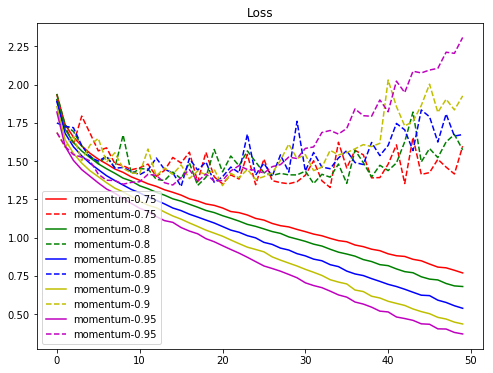

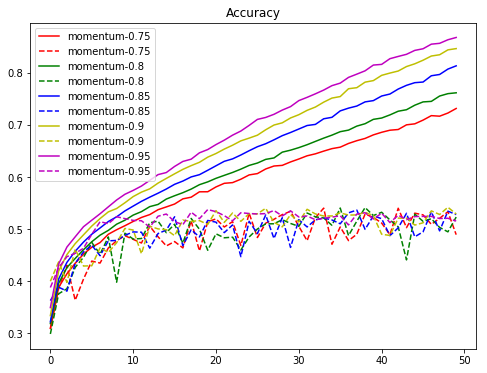

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()